\newpage

## Question

In [30]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.decomposition import PCA

In [31]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes) 
X = heart_disease.data.features 
y = heart_disease.data.targets 

In [45]:
all = heart_disease.data.original
all

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1


1. Define and describe a classification problem using the dataset.

Our target variable is ‘num’, which is the diagnosis of heart disease. We need to build a classification model to predict the diagnosis of heart disease.

2. Apply any chosen data transformations, or explain why no transformations were necessary.

In [51]:
all=all.copy()
all_cate1=all[['sex','cp','fbs','restecg','exang','slope','thal']]
all_cate = pd.get_dummies(all_cate1, columns=all_cate1.columns, drop_first=False)
all_num = all[['age','trestbps','chol','thalach','oldpeak','ca']]
scale = StandardScaler()
all_std = pd.DataFrame(
    scale.fit_transform(all_num), columns=all_num.columns
    ) 
all_transed=pd.concat([all_cate,all_std], axis = 1)
#GitHub Copilot is used in this question.

In [52]:
all_num

,age,trestbps,chol,thalach,oldpeak,ca
0,63,145,233,150,2.3,0.0
1,67,160,286,108,1.5,3.0
2,67,120,229,129,2.6,2.0
3,37,130,250,187,3.5,0.0
4,41,130,204,172,1.4,0.0
...,...,...,...,...,...,...
298,45,110,264,132,1.2,0.0
299,68,144,193,141,3.4,2.0
300,57,130,131,115,1.2,1.0
301,57,130,236,174,0.0,1.0


In [53]:
all_cate

,sex_0,sex_1,cp_1,cp_2,cp_3,cp_4,fbs_0,fbs_1,restecg_0,restecg_1,restecg_2,exang_0,exang_1,slope_1,slope_2,slope_3,thal_3.0,thal_6.0,thal_7.0
0,False,True,True,False,False,False,False,True,False,False,True,True,False,False,False,True,False,True,False
1,False,True,False,False,False,True,True,False,False,False,True,False,True,False,True,False,True,False,False
2,False,True,False,False,False,True,True,False,False,False,True,False,True,False,True,False,False,False,True
3,False,True,False,False,True,False,True,False,True,False,False,True,False,False,False,True,True,False,False
4,True,False,False,True,False,False,True,False,False,False,True,True,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,False,True,True,False,False,False,True,False,True,False,False,True,False,False,True,False,False,False,True
299,False,True,False,False,False,True,False,True,True,False,False,True,False,False,True,False,False,False,True
300,False,True,False,False,False,True,True,False,True,False,False,False,True,False,True,False,False,False,True
301,True,False,False,True,False,False,True,False,False,False,True,True,False,False,True,False,True,False,False


3. Provide a detailed description of the dataset, including variables, summaries, number of observations, data types, and distributions (include at least three statements).

In [54]:
print(heart_disease.variables)
all.shape

        name     role         type demographic  \
0        age  Feature      Integer         Age   
1        sex  Feature  Categorical         Sex   
2         cp  Feature  Categorical        None   
3   trestbps  Feature      Integer        None   
4       chol  Feature      Integer        None   
5        fbs  Feature  Categorical        None   
6    restecg  Feature  Categorical        None   
7    thalach  Feature      Integer        None   
8      exang  Feature  Categorical        None   
9    oldpeak  Feature      Integer        None   
10     slope  Feature  Categorical        None   
11        ca  Feature      Integer        None   
12      thal  Feature  Categorical        None   
13       num   Target      Integer        None   

                                          description  units missing_values  
0                                                None  years             no  
1                                                None   None             no  
2              

(303, 14)

There are 14 features and 303 observations in the dataset. For the predictor variables, 'sex','cp','fbs','restecg','exang','slope','thal' are categorical variables, 'age','trestbps','chol','thalach','oldpeak','ca' are numerical variables. And there are some missing value in the dataset. 

4. Transform the response `num` into a binary outcome: `1` for heart disease and `0` for no heart disease. So combine 1, 2, 3, and 4 into `1` and 0 for `0`. For Questions 4-16, use the transformed binary outcome.

In [55]:
all_transed['num'] = all['num'].apply(lambda i: 1 if i > 0 else 0)
all_transed['num'] = pd.Categorical(all_transed['num'])

5. Analyze relationships between variables and discuss their implications for feature selection or extraction (include at least two statements).

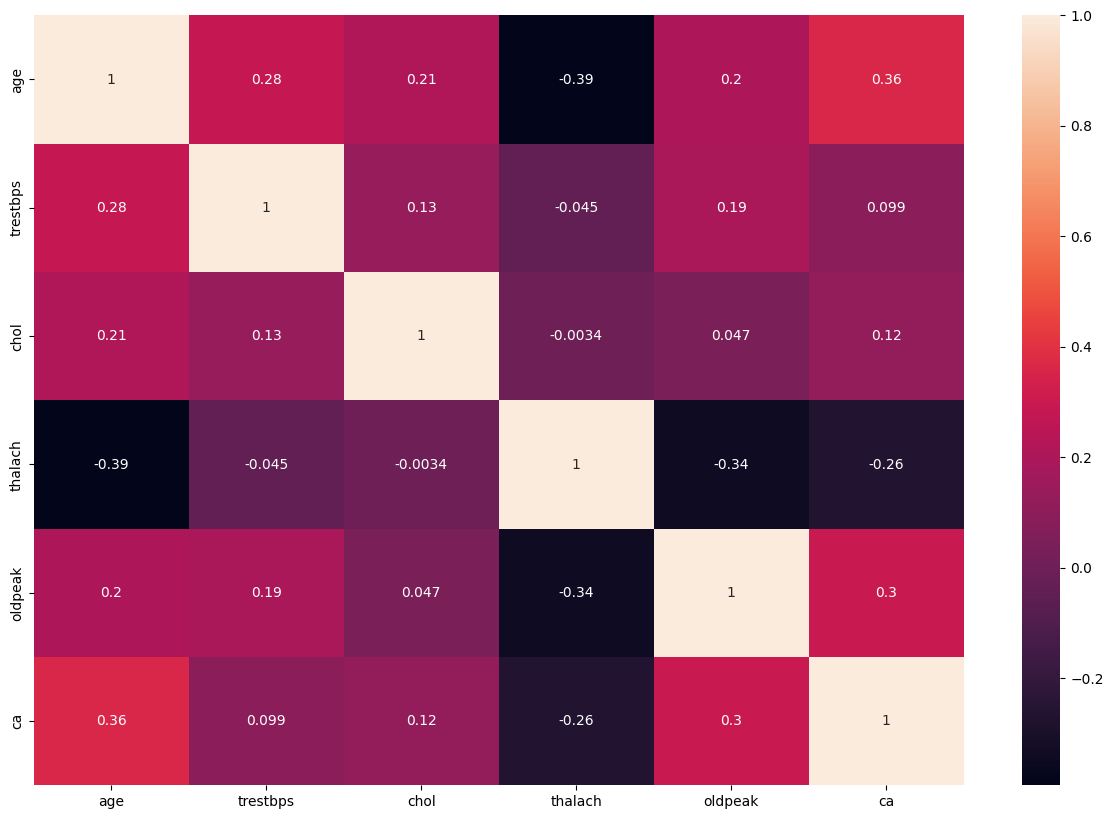

In [56]:
#numercial first
plt.figure(figsize=(15, 10))
sns.heatmap(all_std.corr(),
annot=True)
plt.show()

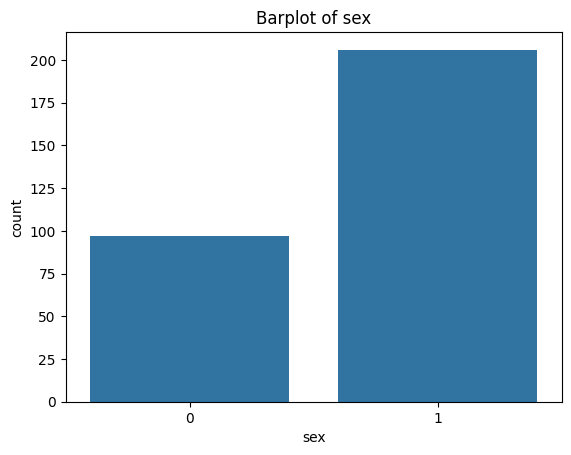

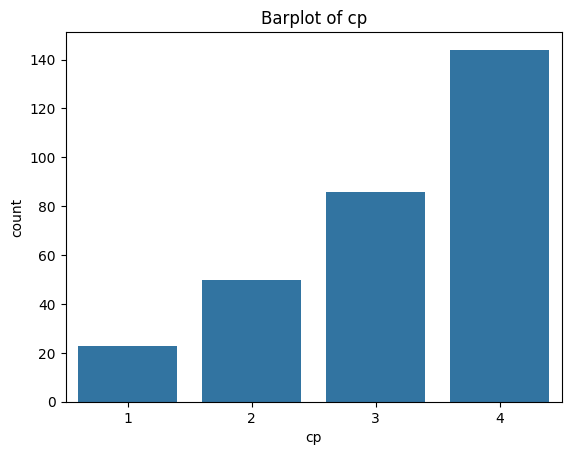

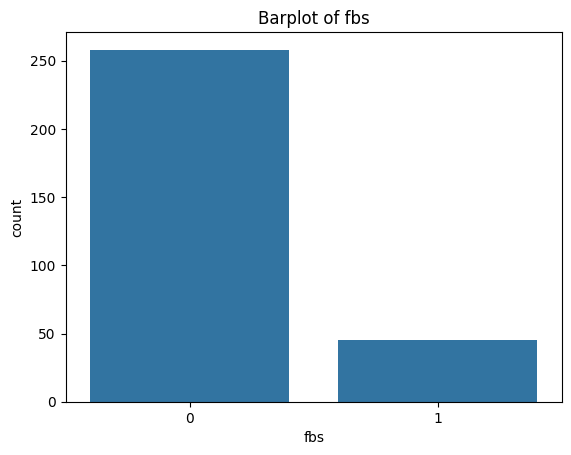

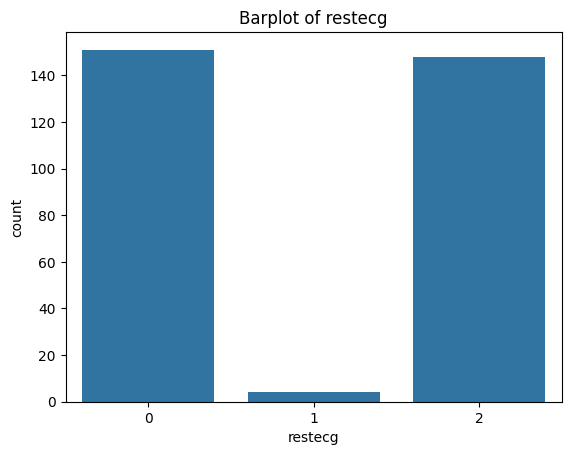

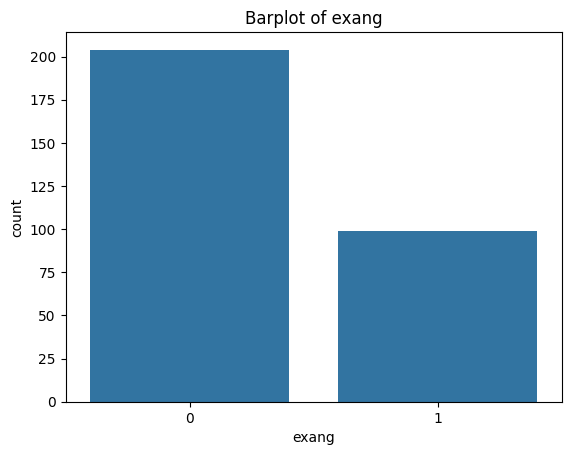

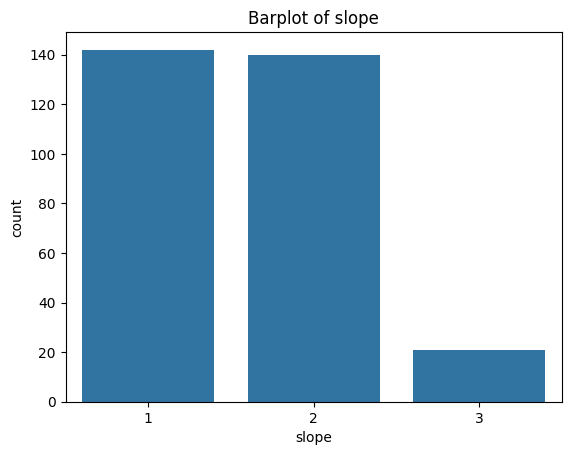

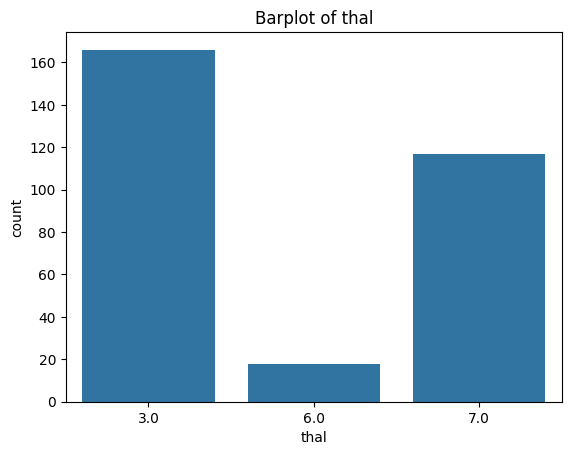

In [63]:
#categorical
for column in all_cate1.columns:
  plt.figure()
  sns.countplot(x=column, data=all_cate1)
  plt.title(f'Barplot of {column}')
  plt.show()

6. Drop the rows with the missing values. How many osbervations after dropping the missing values. Skip the outlier analysis.

In [58]:
all_transed=all_transed.dropna()
all_transed.shape

(299, 26)

There are 299 observations after dropping the missing value.

7. Sub-group analysis: Explore potential sub-groups within the data using appropriate data science methods. Identify and visualize these sub-groups without using the labels and categorical variables. Categroical variables already define sub groups so we don't need to include them for this analysis. 

8. Split 30% of the data for testing using a random seed of 1. Use the remaining 70% for training and model selection.

In [59]:
X = all_transed.drop(['num'], axis=1)
y = all_transed['num']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

9. Identify the two classifiers you have chosen. Justify your selections based on the classifier requirement for this assignment.

We are doing the classification model, so we may try to use the KNN and logistic regression model. Both models are well suited for binary classification tasks and are widely used in classification problems. And logistic regression is the linear, and KNN is non-linear, so we will use two different types of classifier.

10. Specify two metrics to compare classifier performance. Provide technical details on how each metric is computed.

11. Train two selected classifiers in (9) and identify optimal tuning parameters (if applicable) using the training set.

12. Apply a feature selection or extraction method to one of the classifiers in (9). Train this third classifier on the training set and identify optimal tuning parameters (if applicable) using the training set.

13. Use the selected metrics to evaluate three classifiers in (11) and (12) on the test set.
    - Discuss your findings (at least two statements).
    - Discuss the impact of feature selection or extraction on the performance of the classifier (at least one statement).

14. For the best interpretable model identified in (13), analyze and interpret the most important predictor variables in the context of the classification challenge (at least two statements).

15. **[Bonus]** Sub-group improvement strategy: If sub-groups were identified, propose and implement a method to further improve the performance of **one** classifier. Compare the fourth classifier performance with the results from (13).

16. **Team Contributions:** Document each team member’s specific contributions to the questions above. For group submissions, this should match the GitHub commit history. Individual submissions do not need to address this question.

17. **Link** to the public GitHub repository. This is optional for the individual submissions.

\newpage

## References

Python Data Science Handbook by Jake VanderPlas (O'Reilly Media, Inc., Published on Nov 21, 2016)

Janosi, A., Steinbrunn, W., Pfisterer, M., & Detrano, R. (1989). Heart Disease [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C52P4X.